In [1]:
import os
l = os.listdir('runs')
l.sort()
[i[:-3] for i in l[1:]]

['efficient_net_b2_pytorch_cifar10_transfer_learning',
 'resnet110_adam_2e-4',
 'resnet110_pretrained_feedback_100_with_0_as_first_inputs',
 'resnet110_pretrained_feedback_100_with_origin_as_first_inputs',
 'resnet110_pretrained_feedback_100_with_parameter_as_first_inputs',
 'resnet110_pretrained_feedback_10_with_0_as_first_inputs',
 'resnet110_pretrained_feedback_10_with_origin_as_first_inputs',
 'resnet110_pretrained_feedback_10_with_parameter_as_first_inputs',
 'resnet110_pretrained_feedback_1_with_0_as_first_inputs',
 'resnet110_pretrained_feedback_1_with_origin_as_first_inputs',
 'resnet110_pretrained_feedback_20_with_0_as_first_inputs',
 'resnet110_pretrained_feedback_20_with_parameter_as_first_inputs',
 'resnet110_pretrained_feedback_2_with_0_as_first_inputs',
 'resnet110_pretrained_feedback_2_with_origin_as_first_inputs',
 'resnet110_pretrained_feedback_2_with_parameter_as_first_inputs',
 'resnet110_pretrained_feedback_3_with_0_as_first_inputs',
 'resnet110_pretrained_feedback_

In [5]:
trials_names = [
    'resnet110_adam_2e-4',
    'resnet_with_feedback_1x1_inc_16_repeats_10_10_10_num_blocks_18_18_18_num_channels_16_32_64_lr_0.0001_bs_32',
    'resnet_with_feedback_inc_16_repeats_10_10_10_num_blocks_18_18_18_num_channels_16_32_64_lr_0.0001_bs_32',    
]

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import bottleneck
import torch
from helpers.experiment_file_management import load_trial_results
trials = {k:load_trial_results(k) for k in trials_names}
def plot_smooth(values, window, label, linestyle, helper_line_in, color=None, inverse=False):
    if len(values) < window * 2:
        window = len(values) // 10
    values = bottleneck.move_mean(values, window, window)[window:-window]
    if inverse:
        values = 1 - values
    best_v = {'min':np.min(values), 'max':np.max(values)}[helper_line_in]
    if color is None:
        color = plt.plot(values, label=f'{best_v:.5f} {label}', linestyle=linestyle)[0].get_color()
    else:
        plt.plot(values, label=f'{best_v:.5f} {label}', color=color, linestyle=linestyle)
    plt.axhline(best_v, alpha=0.3, color=color, linestyle=linestyle)
    
    return color

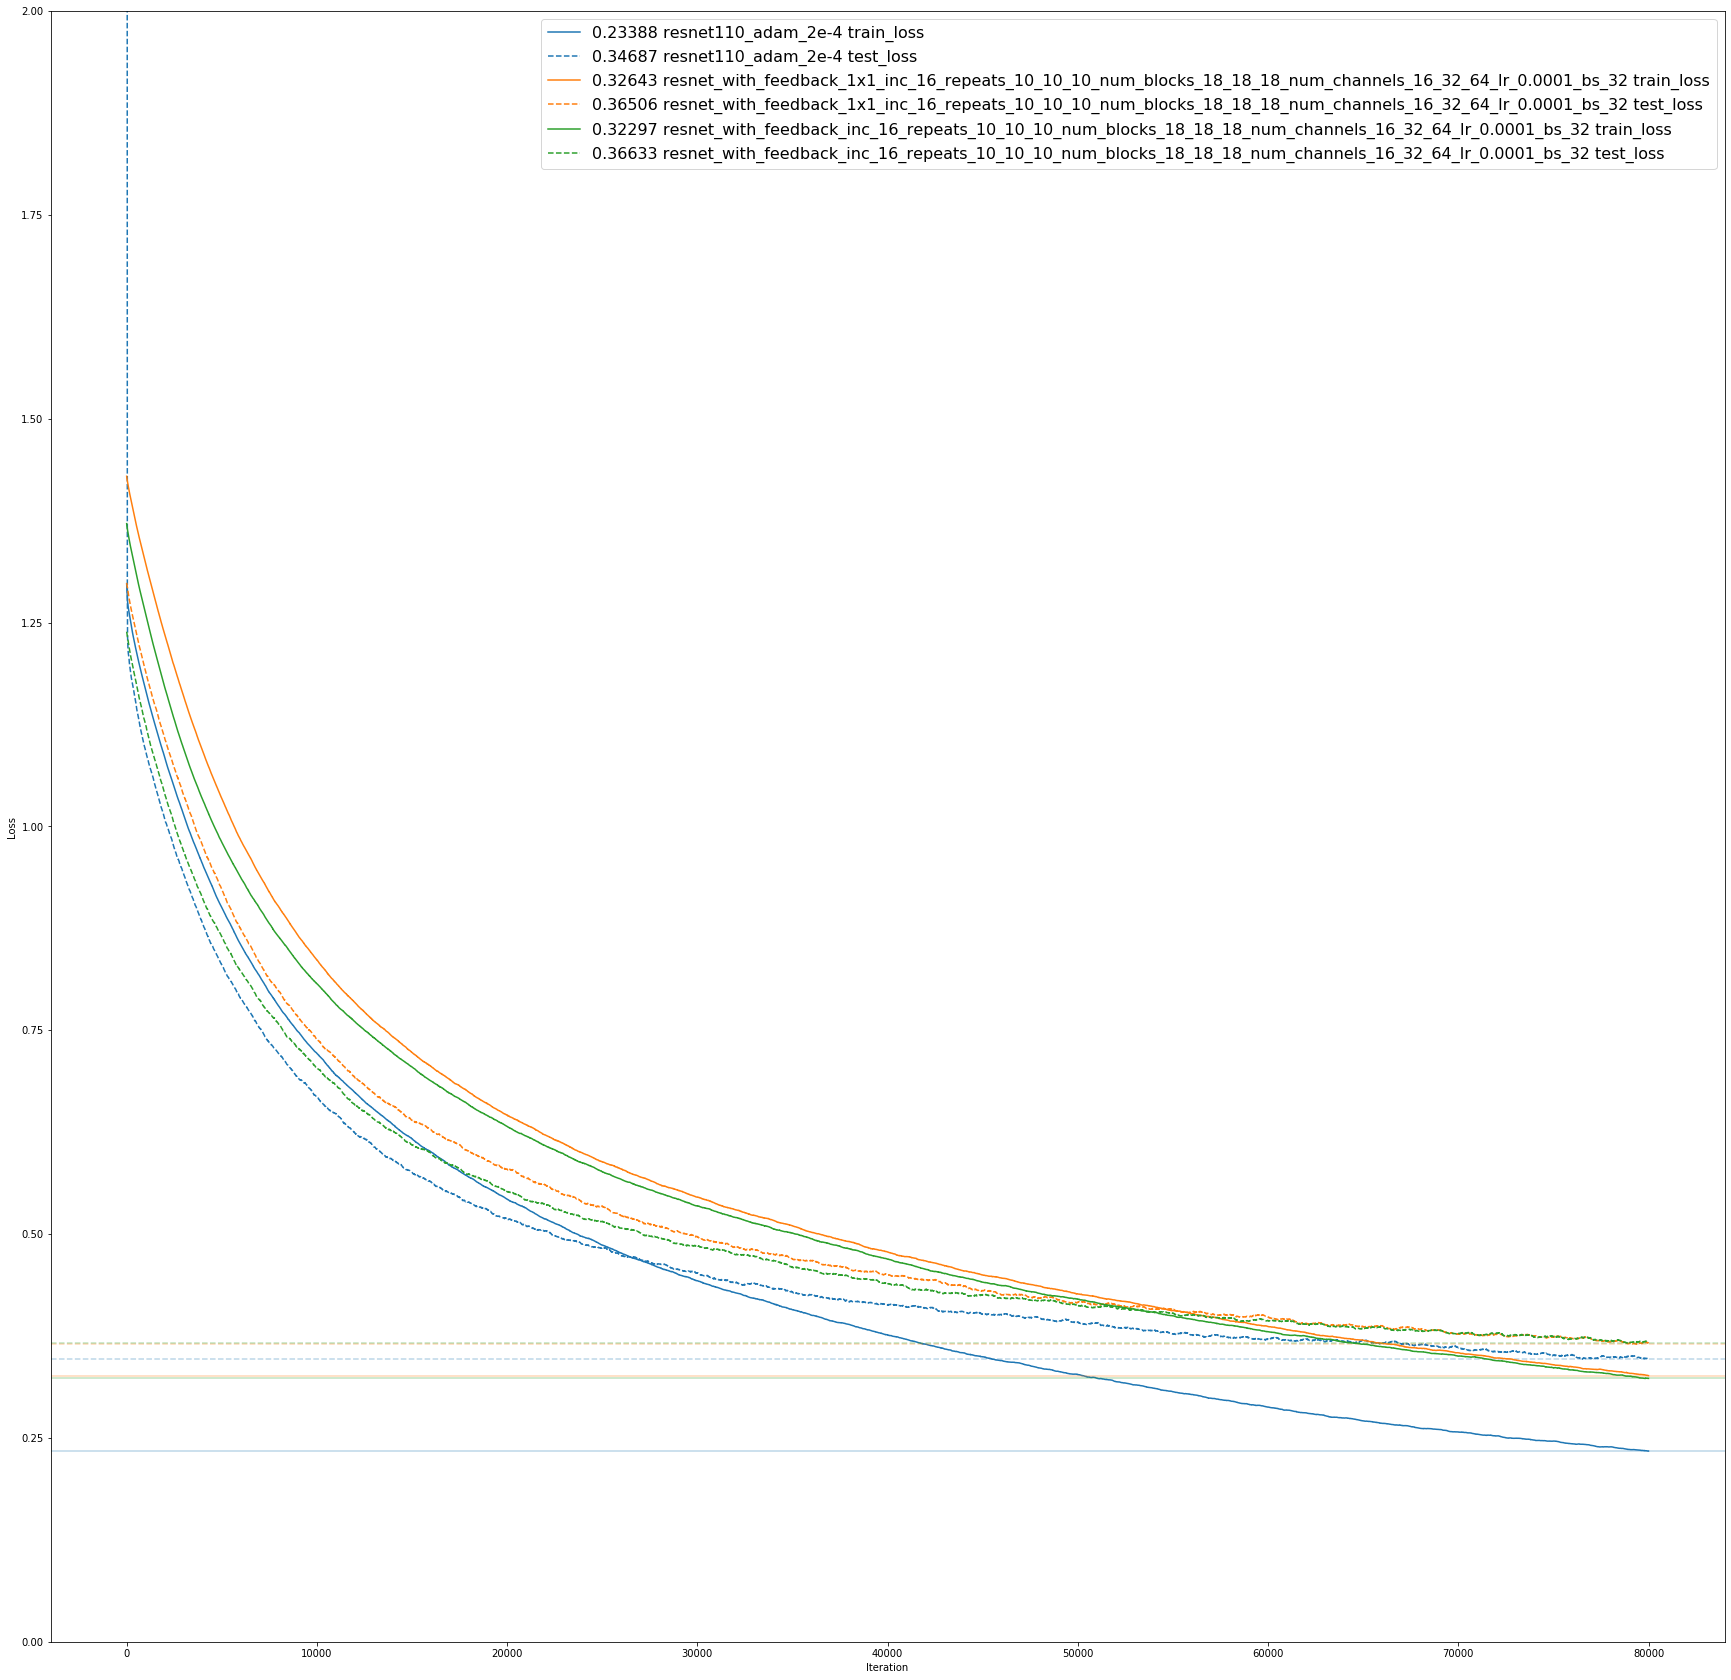

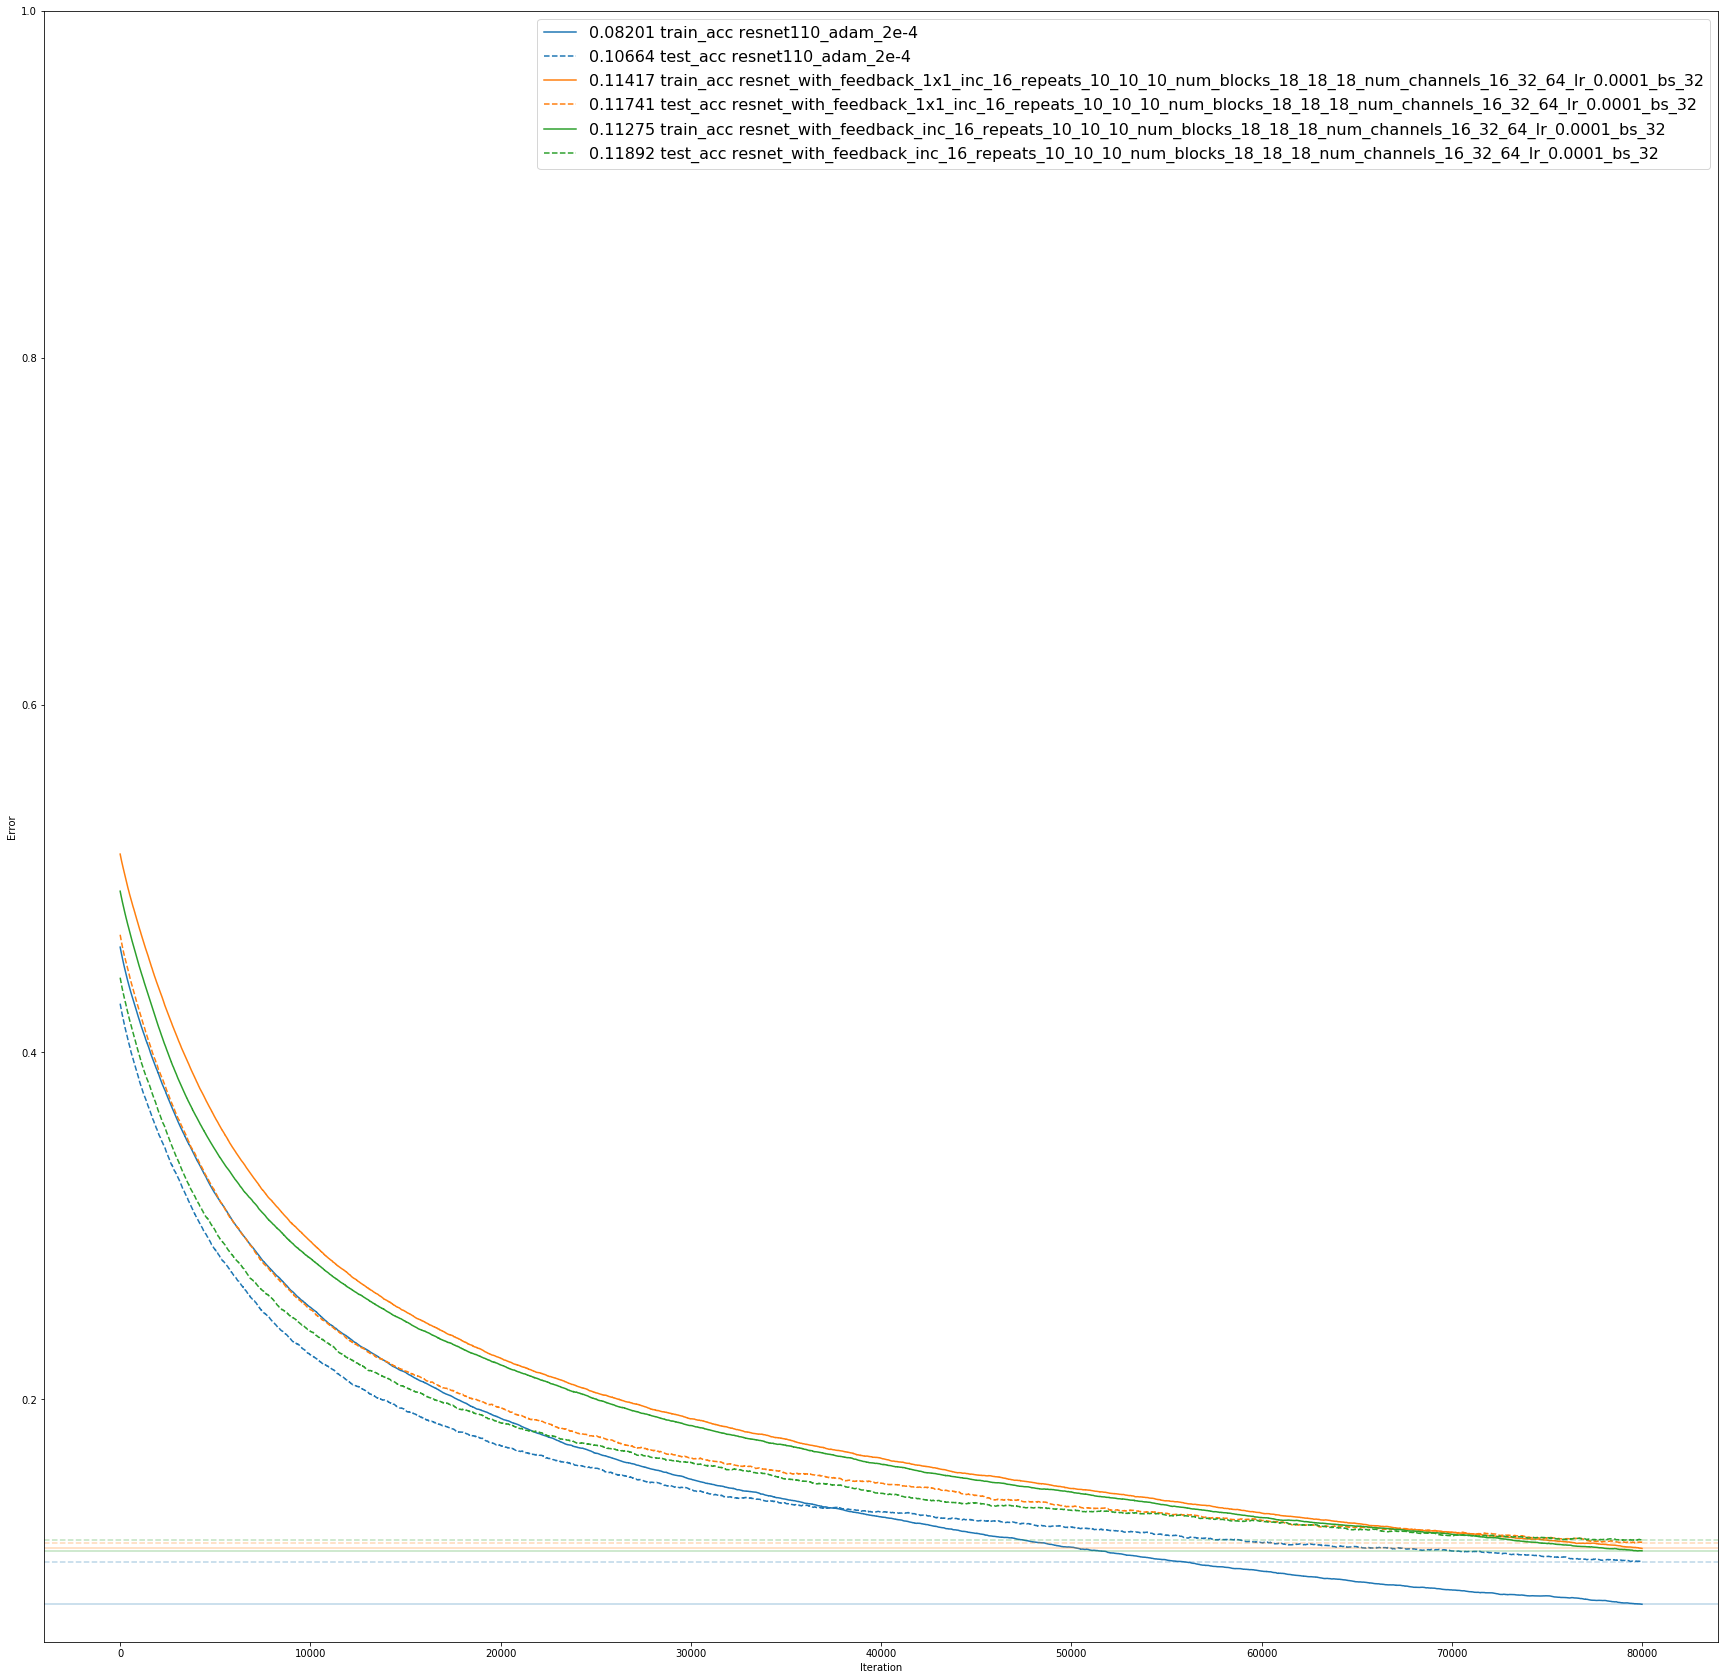

In [9]:
f = plt.figure(figsize=(30,30))
window = 10000

plt.ylabel('Loss')
plt.xlabel('Iteration')
colors = []
for i,(k,v) in enumerate(trials.items()):
    color = plot_smooth(v['train_loss'], window, f'{k} train_loss', '-','min')
    plot_smooth(v['test_loss'], window, f'{k} test_loss', '--','min', color=color)
    colors.append(color)

plt.ylim((0,2))
plt.legend(prop={'size': 16})
plt.show()

f = plt.figure(figsize=(30,30))

# plt.yscale('log')
plt.ylabel('Error')
plt.xlabel('Iteration')

for i,(k,v) in enumerate(trials.items()):
    plot_smooth(v['train_acc'], window, f'train_acc {k}','-', 'min', color=colors[i], inverse=True)
    plot_smooth(v['test_acc'], window, f'test_acc {k}', '--', 'min', color=colors[i], inverse=True)

plt.ylim(top=1)
plt.legend(prop={'size': 16})
plt.show()